In [1]:
import statsmodels.api as sm
import matplotlib
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel('Sample - Superstore.xls')

# Studying the data

In [3]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

## comparing the three categories

In [6]:
#comparing the furniture with other categories
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
tech = df.loc[df['Category'] == 'Technology']

furniture.shape, office.shape,tech.shape



((2121, 21), (6026, 21), (1847, 21))

In [7]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
        'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
        'Product Name', 'Quantity', 'Discount', 'Profit']

furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
tech.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
tech = tech.sort_values('Order Date')


furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
tech = tech.groupby('Order Date')['Sales'].sum().reset_index()

furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
tech = tech.set_index('Order Date')


In [8]:
furniture.head(5)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [9]:
office.head(5)

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430


In [10]:
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
y_tech = tech['Sales'].resample('MS').mean()

furniture = pd.DataFrame({'Order Date': y_furniture.index,
                          'Sales': y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index,
                       'Sales': y_office.values})
tech = pd.DataFrame({'Order Date': y_tech.index,
                       'Sales': y_tech.values})

store = furniture.merge(office, how='inner', on='Order Date')
store = store.merge(tech, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales',
             'Sales_y': 'office_sales', 'Sales': 'tech_sales'}, inplace=True)

store.head()


,Order Date,furniture_sales,office_sales,tech_sales
0,2014-01-01,480.194231,285.357647,449.041429
1,2014-02-01,367.931600,63.042588,229.787143
2,2014-03-01,857.291529,391.176318,2031.948375
3,2014-04-01,567.488357,464.794750,613.028933
4,2014-05-01,432.049188,324.346545,564.698588


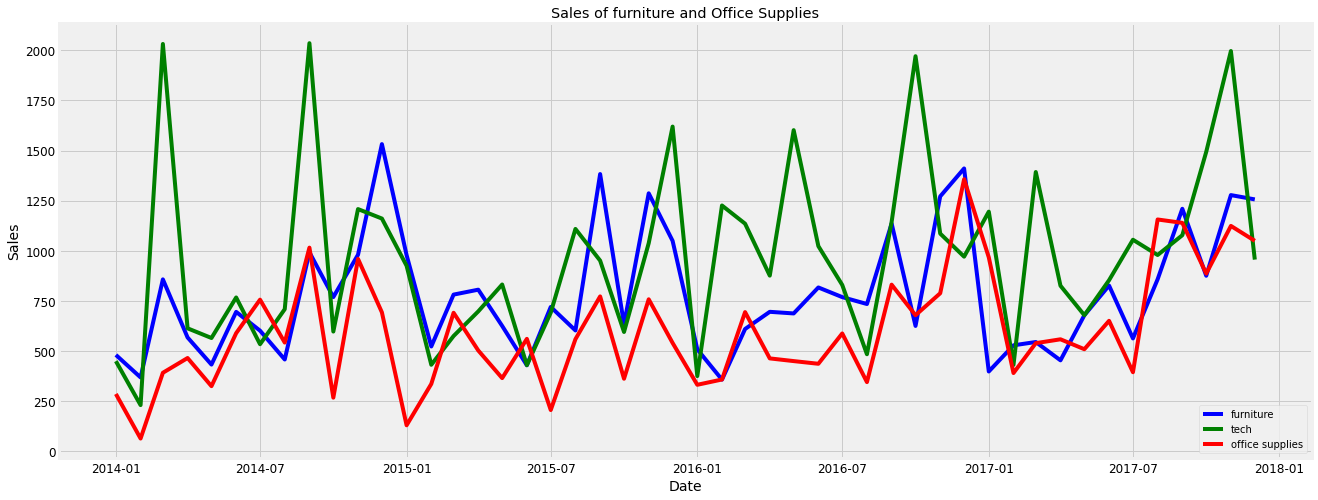

In [11]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'],
         'b-', label='furniture')
plt.plot(store['Order Date'], store['tech_sales'],
         'g-', label='tech')
plt.plot(store['Order Date'], store['office_sales'],
         'r-', label='office supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of furniture and Office Supplies')
plt.legend()


# data pre processing : selecting Furniture

In [12]:
furniture.head(2)

,Order Date,Sales
0,2014-01-01,480.194231
1,2014-02-01,367.931600


In [13]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

## indexing the data

In [14]:
# adding sales of same date
furniture_df = furniture.groupby('Order Date')['Sales'].sum().reset_index() 

#setting order date as index
furniture_df = furniture.set_index('Order Date')
# resampling and taking mean
y = furniture_df['Sales'].resample('MS').mean()
print(y['2017':])

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64


In [15]:
furniture_df.head()

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188


# Visualizing time series data

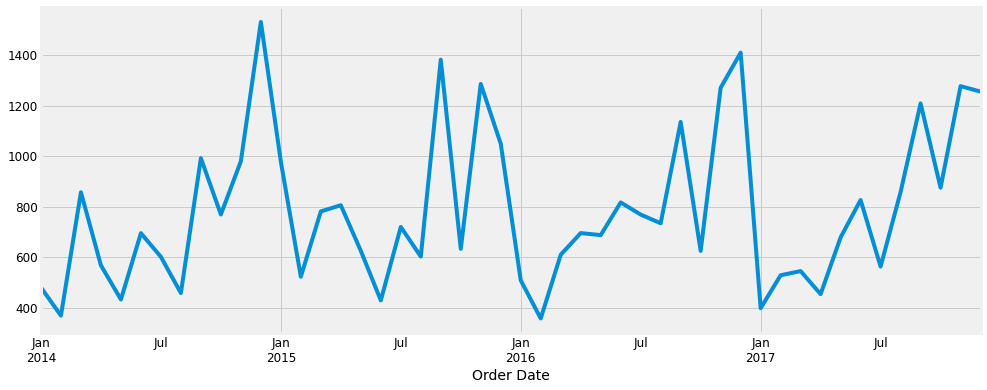

In [16]:
y.plot(figsize=(15, 6))
plt.show()

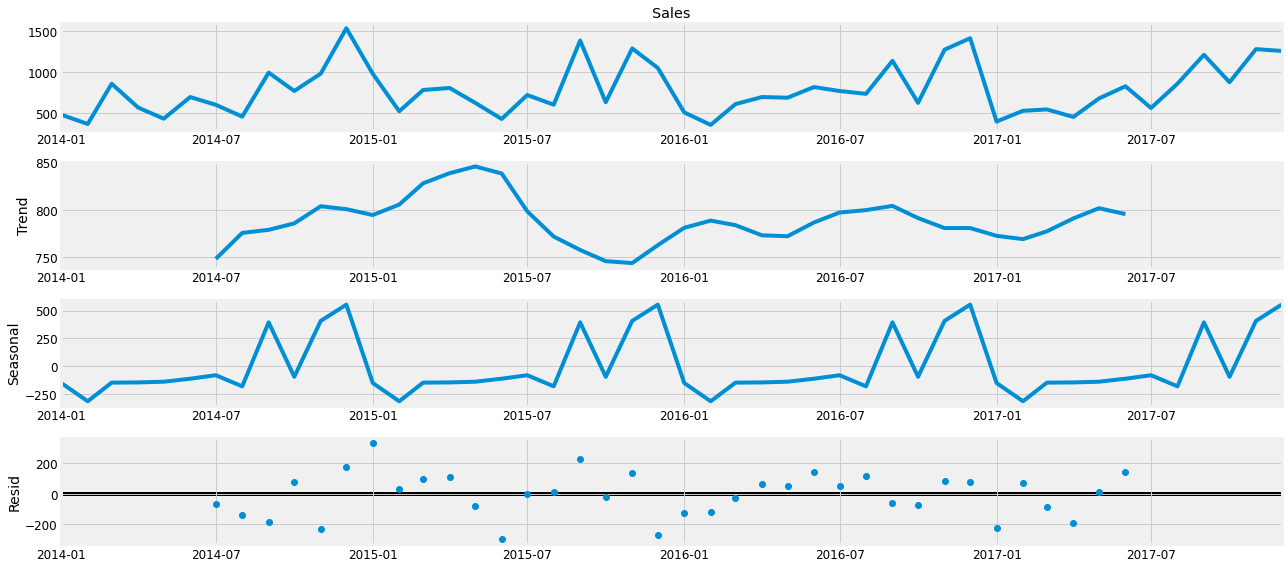

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='addictive')
fig = decomposition.plot()
plt.show()

# forecasting using ARIMA

In [18]:
from statsmodels.tsa.arima_model import ARIMA
model=sm.tsa.ARIMA(furniture_df['Sales'],order=(1,1,1))
model_fit=model.fit()

In [19]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -336.221
Date:                Tue, 09 Aug 2022   AIC                            678.442
Time:                        13:44:57   BIC                            683.992
Sample:                    01-01-2014   HQIC                           680.531
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2745      0.202      1.357      0.175      -0.122       0.671
ma.L1         -0.9959      1.135     -0.877      0.380      -3.221       1.229
sigma2      8.929e+04    9.4e+04      0.950      0.342   -9.49e+04    2.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 1.99
Prob(Q):                              0.61   Prob(JB):                         0.37
Heteroskedasticity (H):               1.47   Skew:                             0.48
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Order Date'>

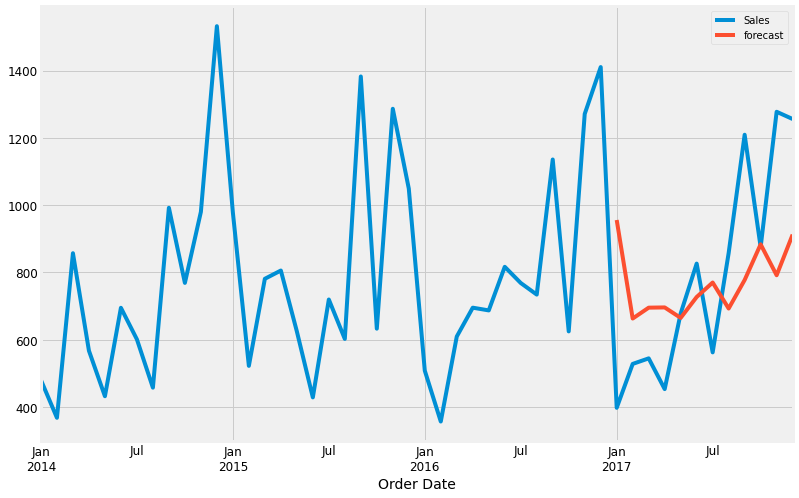

In [20]:
pred_df = furniture_df
pred_df['forecast'] = model_fit.predict(
    start=pd.to_datetime('2017-01-01'),
     dynamic=False)
pred_df[['Sales','forecast']].plot(figsize=(12,8))

# Forecasting using SARIMAX

In [21]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationary=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0676      0.226      0.299      0.765      -0.376       0.511
ma.L1         -1.0000      0.279     -3.590      0.000      -1.546      -0.454
ar.S.L12      -0.4807      0.147     -3.260      0.001      -0.770      -0.192
sigma2      4.108e+04   6.78e-06   6.06e+09      0.000    4.11e+04    4.11e+04


## model diagnostics

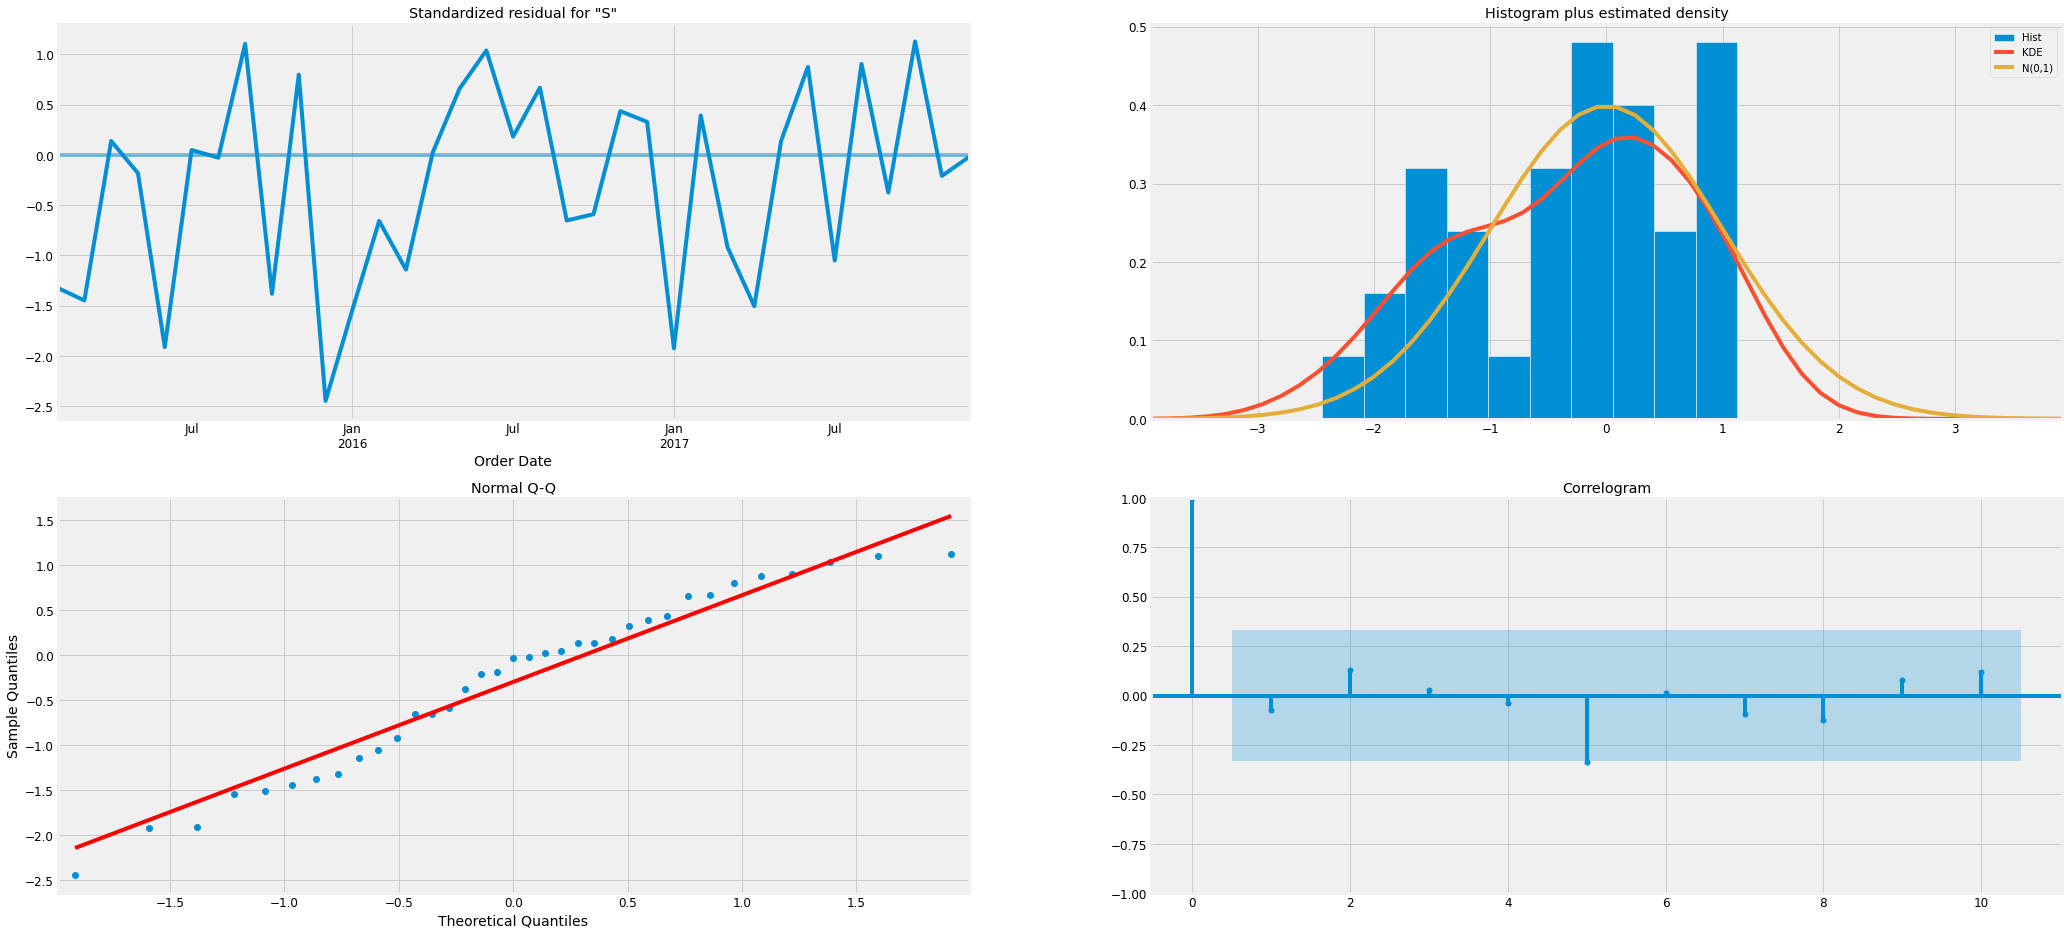

In [22]:
results.plot_diagnostics(figsize=(32, 16))
plt.show()


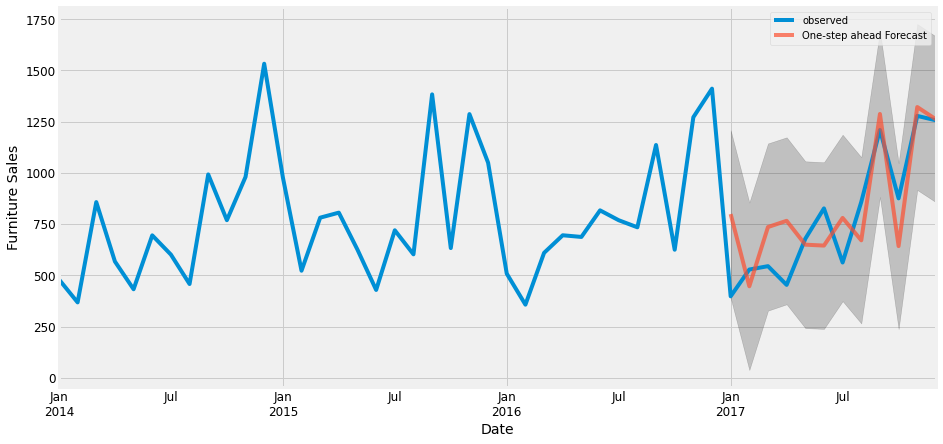

In [23]:
# forecasting present data

pred = results.get_prediction(
    start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast',
                         alpha=.7,
                         figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1],
                color='k',
                alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


## validating forecast

In [24]:
y_forecasted = pred.predicted_mean
y_truth =  y['2017-01-01':]
mse = ((y_forecasted - y_truth)** 2).mean()
print('The Mean Square Error of the Forecast is {}'.format(round(mse,2)))
print('The Root Mean Square Error of our forecast is {}'.format(round(np.sqrt(mse),2)))

The Mean Square Error of the Forecast is 39996.01
The Root Mean Square Error of our forecast is 199.99


## visualizing the final forecast

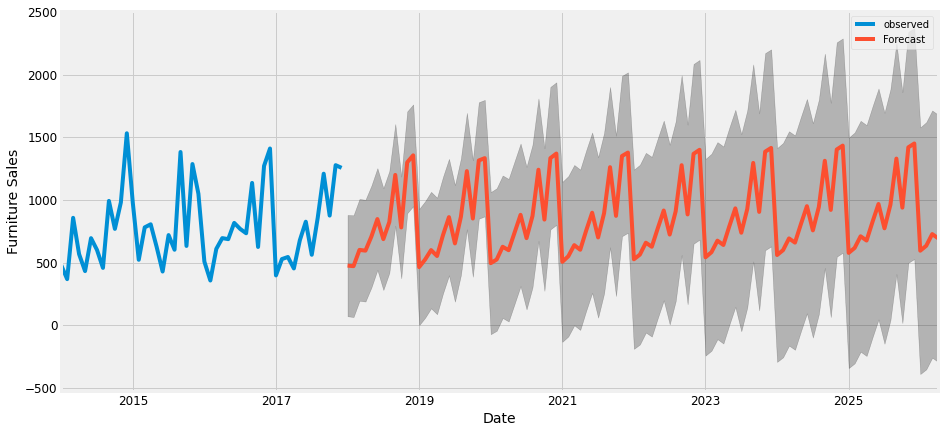

In [25]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1],
                color='k',
                alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


# Forecasting using Prophet

In [26]:
from prophet import Prophet
furniture_model = Prophet(interval_width=0.95)

In [27]:
furniture.head()

,Order Date,Sales
0,2014-01-01,480.194231
1,2014-02-01,367.931600
2,2014-03-01,857.291529
3,2014-04-01,567.488357
4,2014-05-01,432.049188


In [28]:
# renaming the columns as per prophet requirements
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture.head(2)

,ds,y
0,2014-01-01,480.194231
1,2014-02-01,367.931600


In [29]:
furniture_model.fit(furniture)


13:45:01 - cmdstanpy - INFO - Chain [1] start processing
13:45:02 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
furniture_forecast = furniture_model.make_future_dataframe(
    periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

Text(0.5, 1.0, 'Furniture Sales')

<Figure size 720x432 with 0 Axes>

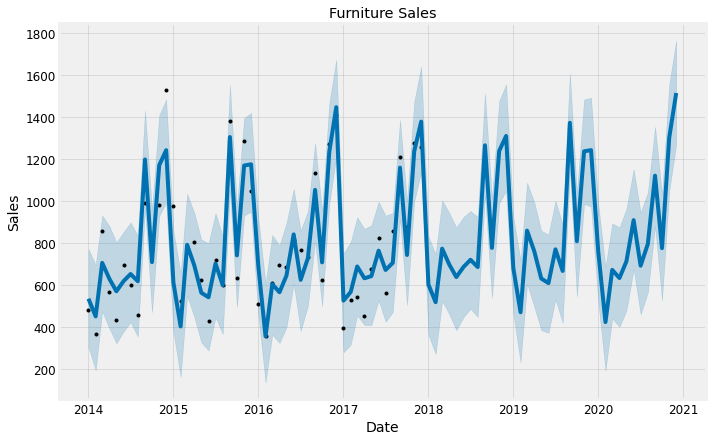

In [31]:
plt.figure(figsize=(10, 6))
furniture_model.plot(furniture_forecast, xlabel='Date', ylabel='Sales')
plt.title('Furniture Sales')

## validating the forecast

In [32]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(furniture_model, initial='730 days',
                         period='30 days', horizon='365 days')


  0%|          | 0/12 [00:00<?, ?it/s]

13:45:05 - cmdstanpy - INFO - Chain [1] start processing
13:45:05 - cmdstanpy - INFO - Chain [1] done processing
13:45:07 - cmdstanpy - INFO - Chain [1] start processing
13:45:07 - cmdstanpy - INFO - Chain [1] done processing
13:45:09 - cmdstanpy - INFO - Chain [1] start processing
13:45:10 - cmdstanpy - INFO - Chain [1] done processing
13:45:12 - cmdstanpy - INFO - Chain [1] start processing
13:45:12 - cmdstanpy - INFO - Chain [1] done processing
13:45:14 - cmdstanpy - INFO - Chain [1] start processing
13:45:14 - cmdstanpy - INFO - Chain [1] done processing
13:45:16 - cmdstanpy - INFO - Chain [1] start processing
13:45:17 - cmdstanpy - INFO - Chain [1] done processing
13:45:19 - cmdstanpy - INFO - Chain [1] start processing
13:45:19 - cmdstanpy - INFO - Chain [1] done processing
13:45:21 - cmdstanpy - INFO - Chain [1] start processing
13:45:22 - cmdstanpy - INFO - Chain [1] done processing
13:45:24 - cmdstanpy - INFO - Chain [1] start processing
13:45:24 - cmdstanpy - INFO - Chain [1]

In [33]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-02-01,785.072394,628.469750,948.028212,356.868273,2016-01-06
1,2016-03-01,1092.176707,925.610539,1244.087779,609.575810,2016-01-06
2,2016-04-01,301.109057,155.173522,466.754067,695.373158,2016-01-06
3,2016-05-01,330.707319,153.462843,488.541976,687.265227,2016-01-06
4,2016-06-01,1587.201880,1418.471724,1758.896637,816.910750,2016-01-06


In [34]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,56 days,223345.354211,472.594281,434.398957,0.616735,0.633788,0.662230,0.142857
1,57 days,224807.953755,474.139171,423.977799,0.562091,0.591906,0.574975,0.214286
2,58 days,209820.157863,458.061304,398.279920,0.510422,0.554680,0.515892,0.285714
3,59 days,241291.518315,491.214330,444.287202,0.569806,0.596562,0.571820,0.214286
4,60 days,363570.559570,602.968125,544.051010,0.625159,0.670048,0.652435,0.142857


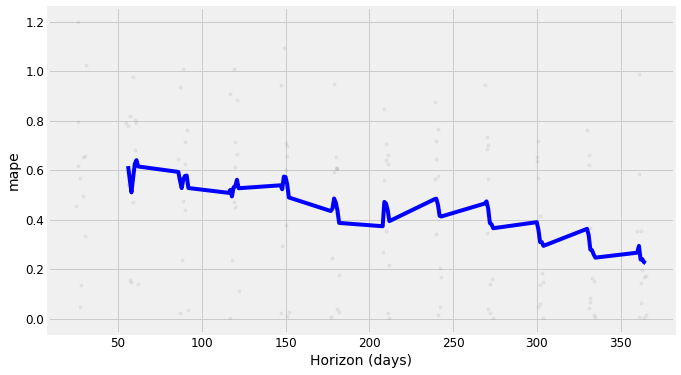

In [35]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


## forecast report

In [36]:
furniture_names = ['furniture_%s' %column for column in furniture_forecast.columns]
furniture_forecast = furniture_forecast.copy()

furniture_forecast.columns = furniture_names
furniture_forecast.head()


,furniture_ds,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,furniture_yearly_lower,furniture_yearly_upper,furniture_multiplicative_terms,furniture_multiplicative_terms_lower,furniture_multiplicative_terms_upper,furniture_yhat
0,2014-01-01,726.058109,304.071605,771.086125,726.058109,726.058109,-190.686099,-190.686099,-190.686099,-190.686099,-190.686099,-190.686099,0.0,0.0,0.0,535.372010
1,2014-02-01,727.494421,194.582121,696.384522,727.494421,727.494421,-276.379157,-276.379157,-276.379157,-276.379157,-276.379157,-276.379157,0.0,0.0,0.0,451.115264
2,2014-03-01,728.791734,475.899069,932.250594,728.791734,728.791734,-22.388253,-22.388253,-22.388253,-22.388253,-22.388253,-22.388253,0.0,0.0,0.0,706.403481
3,2014-04-01,730.228046,393.622196,881.199049,730.228046,730.228046,-100.140909,-100.140909,-100.140909,-100.140909,-100.140909,-100.140909,0.0,0.0,0.0,630.087137
4,2014-05-01,731.618025,323.151263,803.485521,731.618025,731.618025,-160.818882,-160.818882,-160.818882,-160.818882,-160.818882,-160.818882,0.0,0.0,0.0,570.799142


# preparing and dumping files

In [37]:
import pickle

In [38]:
tech.head(2)

,Order Date,Sales
0,2014-01-01,449.041429
1,2014-02-01,229.787143


In [39]:
tech = tech.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
tech.head(2)


,ds,y
0,2014-01-01,449.041429
1,2014-02-01,229.787143


In [40]:
office.head(2)

,Order Date,Sales
0,2014-01-01,285.357647
1,2014-02-01,63.042588


In [41]:
office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office.head(2)


,ds,y
0,2014-01-01,285.357647
1,2014-02-01,63.042588


In [42]:
pickle.dump(furniture,open('furniture_df.pkl','wb'))
pickle.dump(office,open('office_df.pkl','wb'))
pickle.dump(tech,open('tech_df.pkl','wb'))